###### The entire world is transforming digitally and our relationship with technology has grown exponentially over the last few years. We have grown closer to technology, and it has made our life a lot easier by saving time and effort. Today everything is accessible with smartphones — from groceries to cooked food and from medicines to doctors. In this hackathon, we provide you with data that is a by-product as well as a thriving proof of this growing relationship. 

###### When was the last time you ordered food online? And how long did it take to reach you?

###### In this hackathon, we are providing you with data from thousands of restaurants in India regarding the time they take to deliver food for online order. As data scientists, your goal is to predict the online order delivery time based on the given factors.

###### Analytics India Magazine and IMS Proschool bring to you ‘Predicting Predicting Food Delivery Time Hackathon’.

###### Size of training set: 11,094 records

###### Size of test set: 2,774 records

###### FEATURES:

###### Restaurant: A unique ID that represents a restaurant.
###### Location: The location of the restaurant.
###### Cuisines: The cuisines offered by the restaurant.
###### Average_Cost: The average cost for one person/order.
###### Minimum_Order: The minimum order amount.
###### Rating: Customer rating for the restaurant.
###### Votes: The total number of customer votes for the restaurant.
###### Reviews: The number of customer reviews for the restaurant.
###### Delivery_Time: The order delivery time of the restaurant. (Target Classes) 

##### Links for Reference: https://www.machinehack.com/course/predicting-restaurant-food-cost-hackathon/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
# for plotting the ROC Curve
from sklearn.metrics import roc_curve, auc

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()
ohe =OneHotEncoder()
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from time import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
bag=BaggingClassifier()
xtree=ExtraTreesClassifier()
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
from sklearn.decomposition import PCA

In [3]:
train = pd.read_excel(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\Data_Train.xlsx')
test = pd.read_excel(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\Data_Test.xlsx')


In [4]:
train.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [5]:
test.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [6]:
train.shape

(11094, 9)

In [7]:
test.shape

(2774, 8)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.2+ KB


### First we need to clean and perform EDA on this dataset

In [9]:
#find out missing value
train.columns[train.isnull().any()]

Index([], dtype='object')

In [10]:
test.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

In [11]:
#Restaurant contains ID of the restaurant. It will not be relevant into the analytics. Let us drop this columns from trainset.

train.drop(['Restaurant'], axis=1, inplace =True)
test.drop(['Restaurant'], axis=1, inplace =True)

In [12]:
train.head(5)

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [13]:
#Location and Cuisines will have a different meaning itsself in the dataset

#Example: As we only have location of restaurant; but we can use city for analytics of delivery time. 
#what type of cuisines also have impact on the time of preparing of food which can have certain impact on delivery time

#Data has alot of extra symbol. we remove it as the following

train['Minimum_Order']=pd.to_numeric(train['Minimum_Order'].str.replace('₹',' '))
train['Average_Cost']=pd.to_numeric(train['Average_Cost'].str.replace('[^0-9]',''))
train['Rating']=pd.to_numeric(train['Rating'].apply(lambda x : np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))
train['Votes']=pd.to_numeric(train['Votes'].apply(lambda x : np.nan if x=='-' else x))
train['Reviews']=pd.to_numeric(train['Reviews'].apply(lambda x : np.nan if x=='-' else x))
train['Delivery_Time']=pd.to_numeric(train['Delivery_Time'].str.replace('[^0-9]',''))



In [14]:
train.head(10)

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99,3.2,521.0,235.0,65
5,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",150.0,50,3.8,46.0,18.0,30
6,Mumbai Central,"Beverages, Fast Food",150.0,50,3.7,108.0,31.0,30
7,Delhi University-GTB Nagar,"Chinese, Thai, Asian",650.0,50,4.0,1731.0,1235.0,45
8,Delhi University-GTB Nagar,"Mithai, Street Food",100.0,50,3.9,110.0,26.0,30
9,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",200.0,50,3.9,562.0,294.0,65


In [15]:
#check missing value
train.isnull().sum()


Location            0
Cuisines            0
Average_Cost        1
Minimum_Order       0
Rating           1963
Votes            2074
Reviews          2312
Delivery_Time       0
dtype: int64

In [16]:

train.columns[train.isnull().any()]

Index(['Average_Cost', 'Rating', 'Votes', 'Reviews'], dtype='object')

In [17]:
# Fill up the missing Value

q1=train['Rating'].quantile(0.25)
q3=train['Rating'].quantile(0.75)
iqr=q3-q1
train['Rating']=train['Rating'].apply(lambda x: np.nan if x>q3+1.5*iqr or x<q1-1.5*iqr else x)
train['Rating']=train['Rating'].fillna(train['Rating'].median())


q1=train['Votes'].quantile(0.25)
q3=train['Votes'].quantile(0.75)
iqr=q3-q1
train['Votes']=train['Votes'].apply(lambda x: np.nan if x>(q3+1.5*iqr) or x<(q1-1.5*iqr) else x)
train['Votes']=train['Votes'].fillna(train['Votes'].mode()[0])


q1=train['Reviews'].quantile(0.25)
q3=train['Reviews'].quantile(0.75)
iqr=q3-q1
train['Reviews']=train['Reviews'].apply(lambda x: np.nan if x>(q3+1.5*iqr) or x<(q1-1.5*iqr) else x)
train['Reviews']=train['Reviews'].fillna(round(train['Reviews'].mean()))

q1=train['Average_Cost'].quantile(0.25)
q3=train['Average_Cost'].quantile(0.75)
iqr=q3-q1
train['Average_Cost']=train['Average_Cost'].apply(lambda x: np.nan if x>(q3+1.5*iqr) or x<(q1-1.5*iqr) else x)
train['Average_Cost']=train['Average_Cost'].fillna(round(train['Average_Cost'].mean()))

In [18]:
train.head(5)

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99,3.2,4.0,39.0,65


In [19]:

train.columns[train.isnull().any()]

Index([], dtype='object')

In [20]:
train.dtypes

Location          object
Cuisines          object
Average_Cost     float64
Minimum_Order      int64
Rating           float64
Votes            float64
Reviews          float64
Delivery_Time      int64
dtype: object

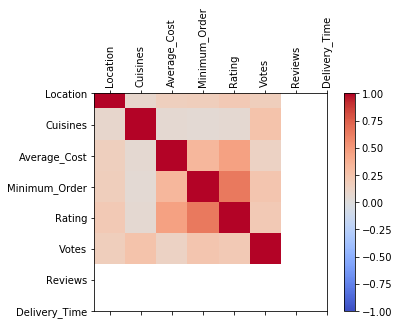

In [21]:
corr = train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train.columns)
ax.set_yticklabels(train.columns)
plt.show()

(6.0, 0.0)

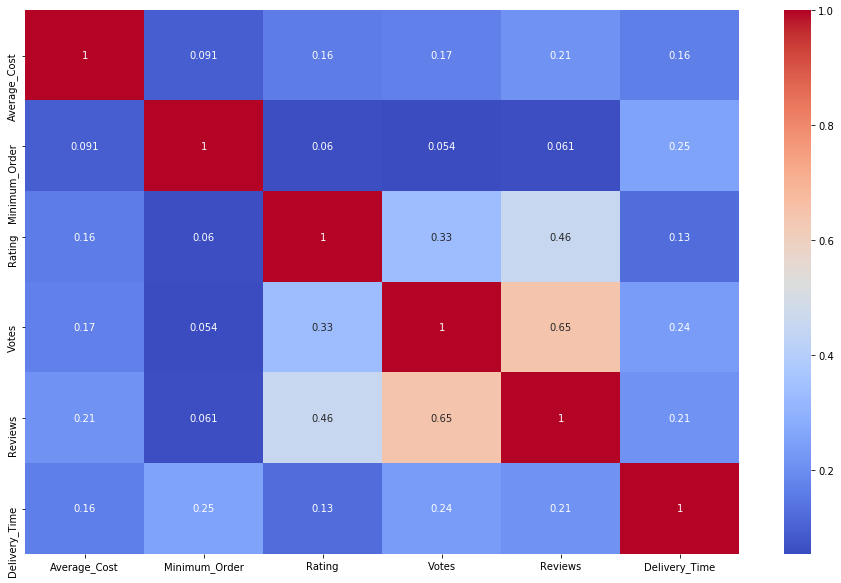

In [22]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [23]:
def plot_features(train):
    plt.figure(figsize=(20, 10))
    sns.set(font_scale=1.2)
    sns.set_style('ticks') # change background to white background
    plt.suptitle('Visualizing The Features Distribution', y=0.95)

    plt.subplot(241)
    color_list = ['gold','purple','brown']
    train.Average_Cost.plot(kind='hist', color='brown')
    plt.xlabel('Average_Cost')
    plt.ylabel('Delivery_Time')

    plt.subplot(242)
    color_list = ['gold','purple','brown']
    train.Minimum_Order.plot(kind='hist', color='brown')
    plt.xlabel('Minimum_Order')
    plt.ylabel('Delivery_Time')

    plt.subplot(243)
    color_list = ['gold','purple','brown']
    train.Rating.plot(kind='hist', color='brown')
    plt.xlabel('Rating')
    plt.ylabel('Delivery_Time')


    plt.subplot(244)
    color_list = ['gold','purple','brown']
    train.Votes.plot(kind='hist', color='brown')
    plt.xlabel('Votes')
    plt.ylabel('Delivery_Time')

    plt.subplot(245)
    color_list = ['gold','purple','brown']
    train.Reviews.plot(kind='hist', color='brown')
    plt.xlabel('Reviews')
    plt.ylabel('Frequency')

    plt.show()



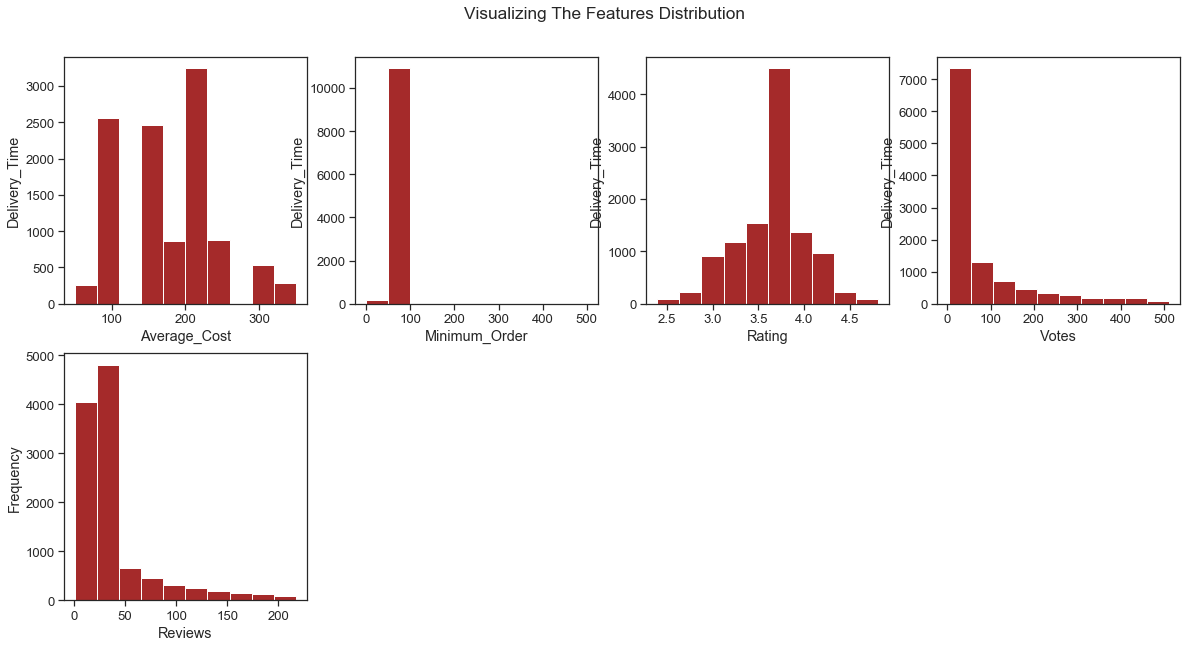

In [24]:
plot_features(train)

In [25]:
#Keeping output

train.to_csv(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\Food_Delivery_Train_output.csv')

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [27]:
train_1 = pd.read_csv(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\Food_Delivery_Train_output.csv')

In [28]:
train_1.head(5)

,Unnamed: 0,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,1,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,2,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,3,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99,3.2,4.0,39.0,65


In [29]:
#Encoding Cuisines Features - Text features

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 1), lowercase=False)
train_cuisines= tf.fit_transform(train_1['Cuisines'])

In [30]:
train_cuisines = pd.DataFrame(data=train_cuisines.toarray(), columns=tf.get_feature_names())

In [31]:
train_1 = pd.concat([train_1, train_cuisines], axis=1)
train_1.drop('Cuisines', axis=1, inplace=True)

In [32]:
train_1.head(5)

,Unnamed: 0,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Afghan,African,...,Tamil,Tea,Tex,Thai,Tibetan,Turkish,Vietnamese,Wraps,Yogurt,dogs
0,0,"FTI College, Law College Road, Pune",200.0,50,3.5,12.0,4.0,30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577657,0.0,0.0
1,1,"Sector 3, Marathalli",100.0,50,3.5,11.0,4.0,30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,2,Mumbai Central,150.0,50,3.6,99.0,30.0,65,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,3,"Sector 1, Noida",250.0,99,3.7,176.0,95.0,30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,4,"Rmz Centennial, I Gate, Whitefield",200.0,99,3.2,4.0,39.0,65,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [33]:
#First we encoding Location for some of model

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 1), lowercase=False)
train_location = tf.fit_transform(train_1['Location'])


In [34]:
train_location = pd.DataFrame(data=train_location.toarray(), columns=tf.get_feature_names())

In [35]:
train_1 = pd.concat([train_1, train_location], axis=1)
train_1.drop('Location', axis=1, inplace=True)

In [36]:
train_1.head(5)

,Unnamed: 0,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Afghan,African,American,...,Stage,Tejas,Timarpur,Tiretti,University,Vihar,Wadala,West,Whitefield,Yerawada
0,0,200.0,50,3.5,12.0,4.0,30,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1,100.0,50,3.5,11.0,4.0,30,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,2,150.0,50,3.6,99.0,30.0,65,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,3,250.0,99,3.7,176.0,95.0,30,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,4,200.0,99,3.2,4.0,39.0,65,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.518651,0.0


In [37]:
#Save train_1 for another modelling
train_1.to_csv(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\Food_Delivery_Train_output_1.csv')

In [38]:
train_2 = pd.read_csv(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\Food_Delivery_Train_output_1.csv')

In [39]:
features = train_2.drop(['Delivery_Time'], axis=1)
labels = train_2['Delivery_Time']
X_train, X_val, y_train, y_val =train_test_split(features, labels, test_size=0.3, random_state=42)

In [40]:
#Write out all the split data

X_train.to_csv(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\train_features.csv', index=False)
X_val.to_csv(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\val_features.csv', index=False)

y_train.to_csv(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\train_labels.csv', index=False)
y_val.to_csv(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\val_labels.csv', index=False)
          
               

#### Logistics Regression Modelling

In [41]:
# First let us do Linear Regression

import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [42]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [43]:
lr = LogisticRegression()
parameters ={
    'C' :[0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
cv=GridSearchCV(lr, parameters, cv=5)
cv.fit(features, labels.values.ravel()) #convert tr_labels from table into array bz the model only accept for array not table

print_results(cv)

BEST PARAMS: {'C': 100}

0.682 (+/-0.014) for {'C': 0.001}
0.686 (+/-0.011) for {'C': 0.01}
0.689 (+/-0.011) for {'C': 0.1}
0.688 (+/-0.01) for {'C': 1}
0.687 (+/-0.01) for {'C': 10}
0.689 (+/-0.009) for {'C': 100}
0.688 (+/-0.011) for {'C': 1000}


In [44]:
#store validation estimator
cv.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
joblib.dump(cv.best_estimator_,'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\LR_model.pkl')

['D:\\Training\\Weekend\\ML_Projects\\Predict Delivery Time\\Participants Data\\LR_model.pkl']

In [46]:
from math import sqrt 
from sklearn.metrics import accuracy_score

!pip install catboost

from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
cat.fit(X_train, y_train, verbose=50,
        use_best_model=True,
        cat_features=categorical_features_indices,
        eval_set=[(X_train, y_train),(X_val, y_val)],
        plot=False)

predictions = cat.predict(X_val)
print('accuracy:', accuracy_score(y_val, predictions))

feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

from sklearn.model_selection import KFold

errcat = []
y_pred_totcat = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat.append(accuracy_score(y_test,y_pred_cat))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

In [47]:
#### SVM

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [48]:
def print_results(results):
    
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [ ]:
svc =SVC()
parameters ={
    'kernel': ['linear', 'rbf'],
    'C': [0.1,1,10]
}
cv= GridSearchCV(svc, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)

In [ ]:
#store validation estimator
cv.best_estimator_

In [ ]:
joblib.dump(cv.best_estimator_,'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\SVM_model.pkl')

In [ ]:
#### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [ ]:
mlp = MLPClassifier()
parameters ={
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu','tanh','logistic'],
    'learning_rate':['constant','invscaling','adaptive']
}
cv= GridSearchCV(mlp, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)

In [ ]:
cv.best_estimator_

In [ ]:
joblib.dump(cv.best_estimator_,'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\MLP_model.pkl')

In [ ]:
#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [ ]:
rf = RandomForestClassifier()
parameters ={
    'n_estimators': [5, 50, 250, 350,500 ],
    'max_depth': [2,4,8,16,32,None]
    
}
cv= GridSearchCV(rf, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)

In [ ]:
cv.best_estimator_

In [ ]:
joblib.dump(cv.best_estimator_,'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\rf_model.pkl')

In [ ]:
#### Boosting tree

In [ ]:
train_bt = pd.read_csv(r'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\Food_Delivery_Train_output_1.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [ ]:

gb = GradientBoostingClassifier()
parameters ={
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1,3,5,7,9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
    
}
cv= GridSearchCV(gb, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)

In [ ]:
cv.best_estimator_

In [ ]:
joblib.dump(cv.best_estimator_,'D:\Training\Weekend\ML_Projects\Predict Delivery Time\Participants Data\gb_model.pkl')

In [ ]:
#Summary

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time